In [159]:
# Initial imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

file = pd.read_csv("heart_data.txt")

In [160]:
data = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']
data = pd.DataFrame([file[col] for col in data]).T

In [161]:
labels = [point if point == 1 else 0 for point in data['chd']]

In [162]:
cont_cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
cont_data = pd.DataFrame([file[col] for col in cont_cols]).T
famhist = [1 if val == 'Present' else 0 for val in file['famhist']]
cont_data['famhist'] = famhist
cont_data = pd.DataFrame(zscore(cont_data, ddof=1))
cont_cols.append('famhist')
cont_data.columns = cont_cols
cont_data['chd'] = data['chd']
cont_data

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist,chd
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1.184570,1
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,-0.842361,1
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,1.184570,0
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1.184570,1
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1.184570,1
...,...,...,...,...,...,...,...,...,...,...
457,3.692037,-0.704470,0.598614,0.811401,1.109862,0.570971,-0.696228,1.039361,-0.842361,0
458,2.130781,0.122871,-0.159507,0.860240,-0.112441,0.608942,0.068445,0.628654,-0.842361,1
459,-1.479624,-0.138395,-1.521228,-1.307946,-1.334744,-1.413043,0.391960,0.834008,-0.842361,0
460,-0.991731,0.384137,3.317227,0.691875,1.109862,0.309916,0.282897,-0.192760,-0.842361,0


In [163]:
cont_data.cov()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.085645
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.088601
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.161353
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.181721
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.044809
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.115595
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.080520
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.239667
famhist,0.085645,0.088601,0.161353,0.181721,0.044809,0.115595,0.080520,0.239667,1.000000


In [164]:
cols = ['age', 'tobacco', 'famhist']
n_components = 2
pca = PCA(n_components=n_components)
pcsT = pca.fit_transform(cont_data[cols])
pcs = [pc for pc in pcsT.T]
pca.explained_variance_ratio_

array([0.51677021, 0.30907402])

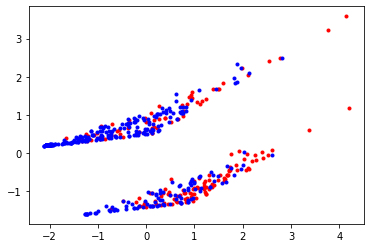

In [165]:
def split_plot(data: list, pca = True):
    if not pca:
        data = np.array([data[0], data[1]]).T  
    disease_data = list()
    healthy_data = list()
    for i in range(len(file['chd'])):
        if file['chd'][i] == 1:
            disease_data.append(data[i])
        else:
            healthy_data.append(data[i])

    pcs_disease = [pc for pc in np.array(disease_data).T]
    pcs_healthy = [pc for pc in np.array(healthy_data).T]

    plt.plot(pcs_disease[0], pcs_disease[1],'r.', label = 'Heart disease')
    plt.plot(pcs_healthy[0], pcs_healthy[1],'b.', label = 'Healthy')

split_plot(pcsT)
x = np.linspace(min(pcsT.T[0]),max(pcsT.T[0]),100)
f = lambda x: -0.8*x-1
# plt.plot(x, f(x))
plt.show()

Correctly classified healthy data: 	0.51.       
Falsely classified healthy data:   	0.49.           
Correctly classified disease data: 	0.85.       
Falsely classified disease data:   	0.15.


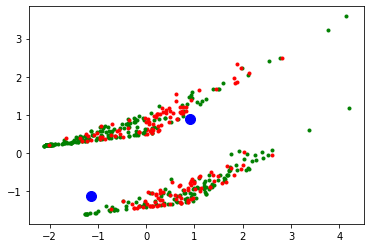

In [180]:
cluster = KMeans(n_clusters=2, n_init=40, algorithm = 'elkan').fit(pcsT)

correct_disease_data = list()
correct_healthy_data = list()

false_disease_data = list()
false_healthy_data = list()

for i in range(len(labels)):
    if labels[i] == cluster.labels_[i]:
        if labels[i] == 1:
            correct_healthy_data.append(pcsT[i])
        else:
            correct_disease_data.append(pcsT[i])
    else:
        if labels[i] == 0:
            false_healthy_data.append(pcsT[i])
        else:
            false_disease_data.append(pcsT[i])

n_correct_healthy_data = int(len(correct_healthy_data))
n_false_healthy_data =   int(len(false_healthy_data))
n_correct_disease_data = int(len(correct_disease_data))
n_false_disease_data =   int(len(false_disease_data))

correct_disease_data = np.array(correct_disease_data).T
correct_healthy_data = np.array(correct_healthy_data).T
false_disease_data =   np.array(false_disease_data).T
false_healthy_data =   np.array(false_healthy_data).T

if n_correct_disease_data < n_false_disease_data:
    n_correct_healthy_data, n_false_healthy_data = n_false_healthy_data, n_correct_healthy_data
    n_correct_disease_data, n_false_disease_data = n_false_disease_data, n_correct_disease_data

correct_healthy_data_pct = round(n_correct_healthy_data / (n_correct_healthy_data + n_false_healthy_data),   2)
false_healthy_data_pct =   round(n_false_healthy_data   / (n_false_healthy_data   + n_correct_healthy_data), 2)
correct_disease_data_pct = round(n_correct_disease_data / (n_correct_disease_data + n_false_disease_data),   2)
false_disease_data_pct =   round(n_false_disease_data   / (n_false_disease_data   + n_correct_disease_data), 2)

print(f"Correctly classified healthy data: \t{correct_healthy_data_pct}. \
      \nFalsely classified healthy data:   \t{false_healthy_data_pct}.     \
      \nCorrectly classified disease data: \t{correct_disease_data_pct}. \
      \nFalsely classified disease data:   \t{false_disease_data_pct}.")

plt.plot(correct_healthy_data[0], correct_healthy_data[1], 'g.')
plt.plot(false_healthy_data[0],   false_healthy_data[1],   'r.')
plt.plot(correct_disease_data[0], correct_disease_data[1], 'g.')
plt.plot(false_disease_data[0],   false_disease_data[1],   'r.')

plt.plot(cluster.cluster_centers_.T[0], cluster.cluster_centers_.T[0], 'b.', ms = 20)

plt.show()

Correctly classified healthy data: 	0.31. 
Falsely classified healthy data: 	0.69. 
Correctly classified disease data: 	0.89. 
Falsely classified disease data: 	0.11.


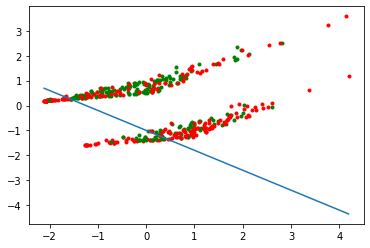

In [167]:
# DEPRECATED

disease_data = list()
healthy_data = list()
for i in range(len(file['chd'])):
    if file['chd'][i] == 1:
        disease_data.append(pcsT[i])
    else:
        healthy_data.append(pcsT[i])

pcs_disease = [pc for pc in np.array(disease_data)]
pcs_healthy = [pc for pc in np.array(healthy_data)]

correct_healthy_data = np.array([datapoint for datapoint in pcs_healthy if datapoint[1] >  f(datapoint[0])]).T
false_healthy_data = np.array([datapoint for datapoint in pcs_healthy if datapoint[1] <= f(datapoint[0])]).T
correct_disease_data = np.array([datapoint for datapoint in pcs_disease if datapoint[1] <  f(datapoint[0])]).T
false_disease_data = np.array([datapoint for datapoint in pcs_disease if datapoint[1] >= f(datapoint[0])]).T

n_correct_healthy_data = int(np.shape(correct_healthy_data)[1])
n_false_healthy_data = int(np.shape(false_healthy_data)[1])
n_correct_disease_data = int(np.shape(correct_disease_data)[1])
n_false_disease_data = int(np.shape(false_disease_data)[1])

if n_correct_disease_data < n_false_disease_data:
    n_correct_healthy_data, n_false_healthy_data = n_false_healthy_data, n_correct_healthy_data
    n_correct_disease_data, n_false_disease_data = n_false_disease_data, n_correct_disease_data

correct_healthy_data_pct = round(n_correct_healthy_data / (n_correct_healthy_data + n_false_healthy_data), 2)
false_healthy_data_pct = round(n_false_healthy_data / (n_false_healthy_data + n_correct_healthy_data), 2)
correct_disease_data_pct = round(n_correct_disease_data / (n_correct_disease_data + n_false_disease_data), 2)
false_disease_data_pct = round(n_false_disease_data / (n_false_disease_data + n_correct_disease_data), 2)

print(f"Correctly classified healthy data: \t{correct_healthy_data_pct}. \nFalsely classified healthy data: \t{false_healthy_data_pct}. \nCorrectly classified disease data: \t{correct_disease_data_pct}. \nFalsely classified disease data: \t{false_disease_data_pct}.")

plt.plot(correct_healthy_data[0], correct_healthy_data[1], 'g.')
plt.plot(false_healthy_data[0], false_healthy_data[1], 'r.')
plt.plot(correct_disease_data[0], correct_disease_data[1], 'g.')
plt.plot(false_disease_data[0], false_disease_data[1], 'r.')
plt.plot(x,f(x))
plt.show()